# Setup and Installation

## Install Dependencies from requirements.txt

Run the cell below to install all required packages from `requirements.txt` into the virtual environment.

In [36]:
import sys
from pathlib import Path

current_dir = Path().resolve()
if current_dir.name == "Codes (.ipynb & .py)":
    req_file = current_dir.parent / "requirements.txt"
elif (current_dir / "requirements.txt").exists():
    req_file = current_dir / "requirements.txt"
elif (current_dir.parent / "requirements.txt").exists():
    req_file = current_dir.parent / "requirements.txt"
else:
    req_file = Path("requirements.txt")

print(f"Installing packages from {req_file}...")
%pip install -q -r "{req_file}"
print("All packages installed successfully!")
print(f"\nPython: {sys.version.split()[0]} | Executable: {sys.executable}")

Installing packages from /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/requirements.txt...
Note: you may need to restart the kernel to use updated packages.
All packages installed successfully!

Python: 3.13.7 | Executable: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/.venv/bin/python


## Import Libraries

Import all necessary libraries for data analysis and visualization.


In [37]:
import pandas as pd
from pathlib import Path
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt

import reverse_geocoder as rg
import pycountry

current_dir = Path().resolve()
if current_dir.name == "notebooks":
    project_root = current_dir.parent
elif (current_dir / "requirements.txt").exists():
    project_root = current_dir
elif (current_dir.parent / "requirements.txt").exists():
    project_root = current_dir.parent
else:
    project_root = Path("/Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo")

CLEAN_PATH = project_root / "data" / "earthquake_data_tsunami.csv"
df = pd.read_csv(CLEAN_PATH)

print(f"Dataset loaded from: {CLEAN_PATH}")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset loaded from: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/data/earthquake_data_tsunami.csv
Dataset shape: 782 rows, 13 columns


# Part 1: Exploratory Data Analysis

This section presents a comprehensive exploratory data analysis of the earthquake dataset with tsunami occurrence labels. The goal of this analysis is to understand the characteristics of our data, identify patterns and relationships between features and the target variable, and prepare the dataset for machine learning model development.

The dataset contains information about earthquakes, including their `magnitude`, `depth`, `location`, and various seismic parameters, along with a binary label indicating whether a tsunami occurred. Through this exploratory analysis, we will examine the distribution of features, investigate class distributions, explore temporal and geographic patterns, and identify which features might be most predictive for tsunami occurrence.

Our analysis will proceed through several stages: initial data inspection and summary statistics, feature engineering to create potentially useful derived features, univariate and bivariate visualizations to understand feature distributions and relationships, temporal analysis to examine trends over time, geographic analysis to identify regional patterns, and finally statistical comparisons between classes to identify discriminative features.


## Initial Data Inspection

We begin by examining the basic structure and characteristics of our dataset to get a first understanding of the data we're working with.


### Basic Statistical Summary

This code generates descriptive statistics for all numeric columns in the dataset, including `count`, `mean`, `standard deviation`, `min`, `max`, and `quartiles`. This provides an initial overview of the data distribution, helping us understand the scale, spread, and potential **outliers** in our features. It's the first step in understanding our data before diving deeper into more specific analyses. The resulting summary table shows statistical measures for each numeric column, revealing the central tendencies and variability of our earthquake features, which will guide our subsequent exploratory work.


In [38]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


### Display First Rows

This code displays the first few rows of the dataset to inspect the actual data values and structure. This allows us to see the raw data format, column names, and sample values, which helps verify that the data was loaded correctly and gives us a sense of what each feature looks like in practice. The resulting table shows the first 5 rows with all columns visible, providing concrete examples of earthquake data entries that we'll be working with throughout the analysis.


In [39]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


## Feature Engineering

After the initial inspection, we create derived features that might capture important relationships not evident in the raw features.


### Check for Missing Values

This code counts the number of missing (null/NaN) values in each column of the dataset. Missing data can significantly impact model performance, so identifying which columns have missing values and how many is crucial for deciding on appropriate imputation strategies or whether to exclude certain features entirely. The output shows the count of missing values per column, where columns with 0 missing values are clean and ready to use, while those with higher counts may require imputation techniques or removal from the analysis.


In [40]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

## Univariate Analysis: Feature Distributions by Class

We now examine how each feature's distribution differs between tsunami and non-tsunami events to identify discriminative features.


### Prepare Features for Univariate Analysis

This code prepares the dataset for univariate analysis by creating derived features and identifying all feature columns. We create `abs_lat` (absolute latitude) and `mag_depth_ratio` (magnitude to depth ratio) as these engineered features might capture relationships not evident in raw features. The code then identifies all feature columns excluding the target variable and temporal features, which will be used for our distribution analysis. The output shows the list of 12 features we'll analyze and provides a summary of the dataset shape and class distribution, confirming we have 478 non-tsunami events and 304 tsunami events for comparison.


In [41]:
df["abs_lat"] = df["latitude"].abs()
df["mag_depth_ratio"] = df["magnitude"] / (df["depth"] + 1.0)

TARGET_COL = "tsunami"
EXCLUDE_FEATS = {"tsunami", "Year", "Month"}
FEAT_COLS = [c for c in df.columns if c not in EXCLUDE_FEATS]

print(f"Features ({len(FEAT_COLS)}): {FEAT_COLS}")
print(df.shape, df[TARGET_COL].value_counts())

Features (12): ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'abs_lat', 'mag_depth_ratio']
(782, 15) tsunami
0    478
1    304
Name: count, dtype: int64


### Identify Numeric Features

This code automatically identifies all numeric columns in the dataset, excluding the target variable and temporal features (Year, Month). We need to know which features are numeric for visualization and analysis purposes, as this list will be used for plotting histograms, boxplots, and other statistical visualizations that require numeric data. The output provides a list of 12 numeric feature names that can be used for further analysis and visualization, ensuring we work with the appropriate data types for each type of analysis.


In [42]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,abs_lat,mag_depth_ratio
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747,21.805046,0.304627
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778,16.791146,0.230927
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000,0.093000,0.010421
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000,6.940475,0.139138
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000,17.704500,0.255556
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000,35.335000,0.461001
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000,71.631200,1.756757


## Bivariate Analysis: Feature Relationships

We explore relationships between pairs of features and how they relate to the target variable using scatter plots to identify potential feature interactions.


### Temporal Analysis: Events by Year and Class

This code creates a cross-tabulation table showing the number of events for each year, broken down by tsunami class (0 or 1), with missing combinations filled with 0. Temporal patterns can reveal trends over time, and understanding how tsunami events are distributed across years helps identify potential temporal dependencies in the data. This analysis is particularly important as it informs how we should split our train/test sets, deciding between a temporal split (respecting time order) versus a random split. The resulting table has years as rows and tsunami classes as columns, showing the count of events for each combination and revealing temporal trends and class distribution over time.


In [43]:
df.groupby(["tsunami"]).size()

tsunami
0    478
1    304
dtype: int64

### Display Year-Class Distribution Table

This code displays the previously created cross-tabulation table showing events by year and class. Visualizing the table helps us quickly identify patterns, such as years with unusually high or low tsunami rates, or temporal trends in the data distribution. The formatted table clearly shows the distribution of events across years and classes, making temporal patterns easy to identify and interpret for our analysis.


In [44]:
year_cls = df.groupby(["Year", "tsunami"]).size().unstack(fill_value=0)


## Magnitude Analysis

Magnitude is a key feature for earthquake characterization. We examine its distribution and relationship with tsunami occurrence.


### Visualize Temporal Trends

This code creates a stacked bar chart showing the number of events per year, with different colors for tsunami (class 1) and non-tsunami (class 0) events. Visual representation makes it easier to spot temporal trends and patterns, allowing us to see if tsunami events are increasing or decreasing over time, or if certain years had unusual activity. This visualization informs our understanding of the data and potential temporal dependencies that might need to be accounted for in our models. The resulting bar chart has years on the x-axis and event counts on the y-axis, with each bar stacked to show the proportion of tsunami versus non-tsunami events per year, clearly revealing temporal patterns in the data.


In [45]:
year_cls

tsunami,0,1
Year,,
2001,28,0
2002,25,0
2003,31,0
2004,32,0
2005,28,0
2006,26,0
2007,37,0
2008,25,0
2009,26,0


### Magnitude Distribution Analysis

This code bins earthquake magnitudes into discrete ranges (0-1, 1-2, ..., 9-10) and counts how many events fall into each magnitude bin, then visualizes the overall distribution of magnitudes. Magnitude is a key feature for tsunami prediction, and understanding the distribution helps us see if most earthquakes are low-magnitude or if there's a good spread across different magnitudes. Binning also helps identify magnitude ranges that might be more associated with tsunamis, which could inform feature engineering or model interpretation. The resulting bar chart shows the count of events in each magnitude bin, revealing the distribution of earthquake magnitudes in our dataset and helping identify the most common magnitude ranges present in the data.


## Geographic Analysis

Geographic location plays an important role in tsunami occurrence due to tectonic plate boundaries and coastal geography. We analyze the geographic distribution of events and tsunami rates by country.


<Figure size 640x480 with 0 Axes>

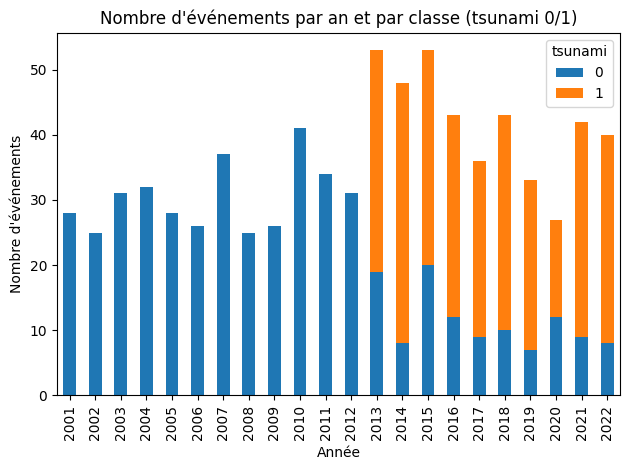

In [46]:
plt.figure()
year_cls.plot(kind="bar", stacked=True)
plt.title("Nombre d'événements par an et par classe (tsunami 0/1)")
plt.xlabel("Année"); plt.ylabel("Nombre d'événements")
plt.tight_layout()
plt.show()

### Magnitude Distribution by Class

This code creates a stacked bar chart showing the distribution of events across magnitude bins, broken down by tsunami class, which reveals whether certain magnitude ranges are more associated with tsunamis. This analysis helps identify if there's a relationship between earthquake magnitude and tsunami occurrence, as if higher magnitude bins show more tsunamis, magnitude is likely a strong predictive feature. This visualization makes the relationship clear and helps us understand how magnitude relates to the target variable. The resulting stacked bar chart has magnitude bins on the x-axis, with each bar showing the proportion of tsunami versus non-tsunami events in that magnitude range, revealing whether higher magnitudes correlate with tsunami occurrence.


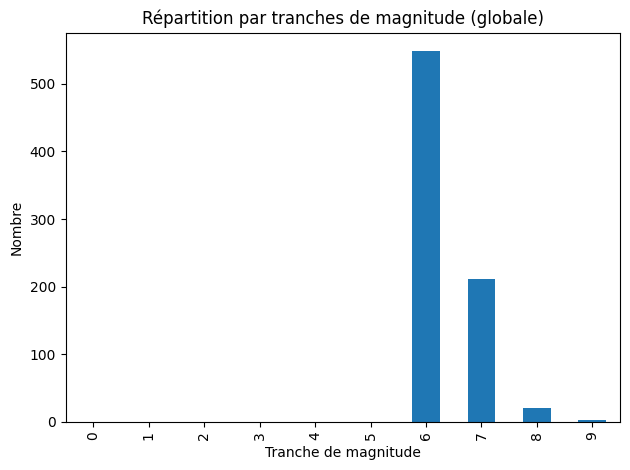

In [47]:
bins = np.arange(0, 11, 1)
labels = [f"{i}" for i in range(0, 10)]
df["_mag_bin"] = pd.cut(df["magnitude"].clip(lower=0, upper=10), bins=bins, labels=labels, include_lowest=True)

mag_counts = df["_mag_bin"].value_counts().sort_index()

plt.figure()
mag_counts.plot(kind="bar")
plt.title("Répartition par tranches de magnitude (globale)")
plt.xlabel("Tranche de magnitude"); plt.ylabel("Nombre")
plt.tight_layout()
plt.show()

### Geographic Analysis: Country Identification

This code uses reverse geocoding to convert latitude/longitude coordinates into country names, then counts how many events occurred in each country and creates a cross-tabulation of the top 15 countries by tsunami class. Geographic location is important for tsunami prediction as some regions are more prone to tsunamis, such as the Pacific Ring of Fire, and understanding which countries have the most events and their tsunami rates can reveal geographic patterns that might be useful as features in our models. The resulting table shows the top 15 countries with the most earthquake events, broken down by tsunami class, which reveals geographic hotspots and whether certain regions have higher tsunami rates that could be informative for prediction.


/var/folders/_d/ltkjwbkx4kv6hgm3pvws7ngr0000gn/T/ipykernel_94454/2741945657.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mag_cls = df.groupby(["_mag_bin", "tsunami"]).size().unstack(fill_value=0).reindex(labels)


<Figure size 640x480 with 0 Axes>

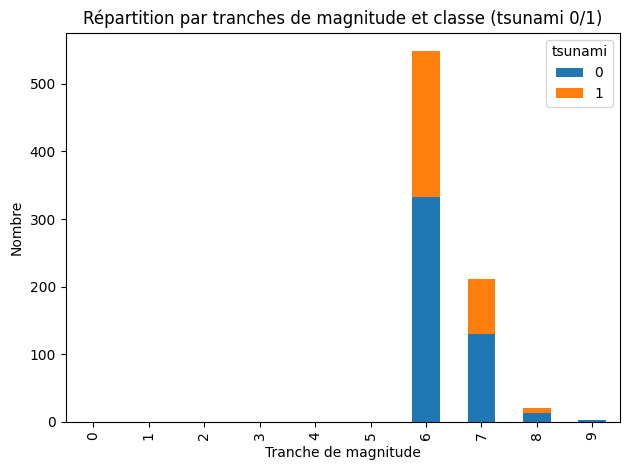

In [48]:
mag_cls = df.groupby(["_mag_bin", "tsunami"]).size().unstack(fill_value=0).reindex(labels)
plt.figure()
mag_cls.plot(kind="bar", stacked=True)
plt.title("Répartition par tranches de magnitude et classe (tsunami 0/1)")
plt.xlabel("Tranche de magnitude"); plt.ylabel("Nombre")
plt.tight_layout()
plt.show()

## Statistical Summary by Class

Finally, we provide a comprehensive quantitative comparison of all features between the two classes to identify the most discriminative features for our classification task.


### Top Countries by Event Count

This code creates a bar chart showing the top 15 countries ranked by total number of earthquake events, regardless of tsunami class. This visualization helps identify which geographic regions dominate our dataset, and understanding the geographic distribution is important for assessing data representativeness and potential geographic biases that might affect model generalization. The resulting bar chart has countries on one axis and event counts on the other, clearly showing which countries have the most earthquake data in our dataset and helping us understand the geographic coverage of our training data.


In [49]:
coords = list(zip(df["latitude"].astype(float), df["longitude"].astype(float)))

results = rg.search(coords)

ccodes = [r["cc"] for r in results]

def cc_to_name(cc):
    try:
        return pycountry.countries.get(alpha_2=cc).name
    except Exception:
        return cc

countries = [cc_to_name(cc) for cc in ccodes]

df = df.copy()
df["country"] = countries

country_counts = df["country"].value_counts()

top15 = country_counts.head(15).index
country_cls = (df[df["country"].isin(top15)]
               .groupby(["country","tsunami"]).size()
               .unstack(fill_value=0)
               .loc[top15])

country_cls


tsunami,0,1
country,,
Indonesia,107,14
Papua New Guinea,34,34
Japan,49,18
Chile,34,16
Vanuatu,26,16
Solomon Islands,18,21
United States,14,23
Tonga,14,22
Russian Federation,15,15


### Country-Level Tsunami Rates

This code creates a stacked bar chart showing the distribution of tsunami versus non-tsunami events for the top 15 countries, allowing us to see which countries have higher tsunami rates. This reveals geographic patterns in tsunami occurrence, as countries with higher proportions of tsunami events might share geographic characteristics such as coastal regions or tectonic plate boundaries that could be predictive. This analysis helps identify if country or region is a useful feature for our models. The resulting stacked bar chart has countries on the x-axis, with each bar showing the proportion of tsunami (class 1) versus non-tsunami (class 0) events, revealing which countries have higher tsunami rates and potential geographic risk factors that might influence tsunami occurrence.


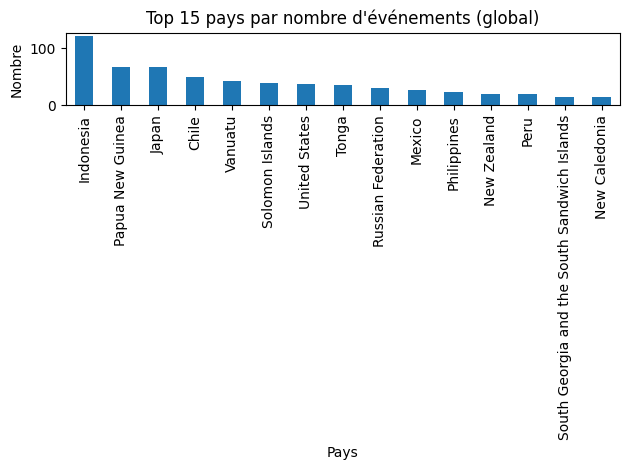

In [50]:
plt.figure()
country_counts.head(15).plot(kind="bar")
plt.title("Top 15 pays par nombre d'événements (global)")
plt.xlabel("Pays"); plt.ylabel("Nombre")
plt.tight_layout()
plt.show()

### Statistical Summary by Class

This code calculates comprehensive statistics (mean, standard deviation, median, min, max) for all numeric features, grouped by tsunami class, providing a detailed comparison of feature distributions between classes. This quantitative comparison helps identify which features show the most significant differences between tsunami and non-tsunami events, where features with large differences in means or medians are likely to be more predictive. This analysis complements the visualizations with precise numerical comparisons that can guide feature selection and model development. The resulting multi-level table shows statistical measures for each numeric feature with separate columns for each class, where large differences in means or medians between classes indicate highly discriminative features for tsunami prediction.


<Figure size 640x480 with 0 Axes>

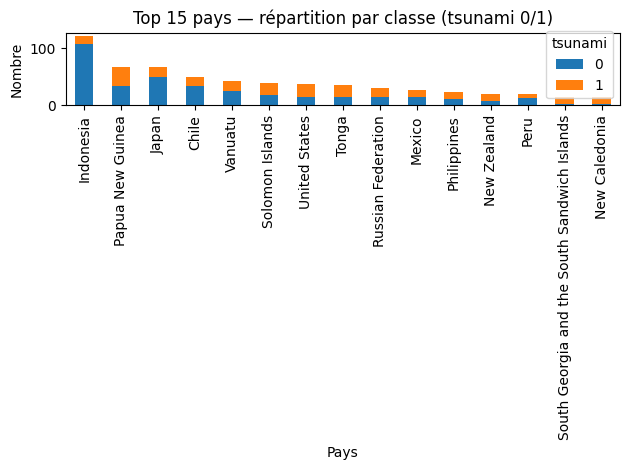

In [51]:
plt.figure()
country_cls.plot(kind="bar", stacked=True)
plt.title("Top 15 pays — répartition par classe (tsunami 0/1)")
plt.xlabel("Pays"); plt.ylabel("Nombre")
plt.tight_layout()
plt.show()

In [52]:
TARGET = "tsunami"
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col not in [TARGET, "Year", "Month"]]

group_stats = df.groupby(TARGET)[num_cols].agg(["mean","std","median","min","max"])
group_stats


magnitude                                  cdi                       \
             mean       std median  min  max      mean       std median min   
tsunami                                                                       
0        6.942803  0.459541    6.8  6.5  9.1  3.928870  3.160149    5.0   0   
1        6.938487  0.423250    6.8  6.5  8.3  4.970395  3.084473    6.0   0   

             ...    abs_lat                                        \
        max  ...       mean        std    median     min      max   
tsunami      ...                                                    
0         9  ...  20.282844  15.680918  17.05105  0.0930  63.5144   
1         9  ...  24.198509  18.172076  18.55880  0.3819  71.6312   

        mag_depth_ratio                                          
                   mean       std    median       min       max  
tsunami                                                          
0              0.308977  0.232501  0.253846  0.010421  1.756757  
1              0.297787  0.228643  0.257162  0.010552  1.133333  

[2 rows x 60 columns]

# Part 2: Machine Learning Pipeline Setup

This section sets up the machine learning infrastructure for tsunami prediction. We prepare the data, create custom transformers for feature engineering, build preprocessing pipelines, and define the classification models that will be used. This section focuses on the setup and configuration of the ML pipeline components.


In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)

import joblib
from pathlib import Path

import mlflow
import mlflow.sklearn
from mlflow import log_metric, log_param, log_params, log_artifacts

## Data Preparation

Prepare the dataset for machine learning by defining features and target variable.

In [54]:
TARGET = "tsunami"

EXCLUDE_FEATS = {TARGET, "Year", "Month"}

FEATURE_COLS = [col for col in df.columns if col not in EXCLUDE_FEATS]

if 'country' in FEATURE_COLS:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['country_encoded'] = le.fit_transform(df['country'].astype(str))
    FEATURE_COLS = [col if col != 'country' else 'country_encoded' for col in FEATURE_COLS]
    print(f"Encoded 'country' column ({len(le.classes_)} unique countries)")

X = df[FEATURE_COLS].copy()
y = df[TARGET].copy()

print(f"Dataset shape: {X.shape}")
print(f"Features ({len(FEATURE_COLS)}): {FEATURE_COLS}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nTarget balance: {y.mean():.2%} positive class")


Encoded 'country' column (67 unique countries)
Dataset shape: (782, 14)
Features (14): ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'abs_lat', 'mag_depth_ratio', '_mag_bin', 'country_encoded']

Target distribution:
tsunami
0    478
1    304
Name: count, dtype: int64

Target balance: 38.87% positive class


## MLflow Setup

Initialize MLflow for experiment tracking and model versioning. This will track all hyperparameters, metrics, and models for easy comparison and reproducibility.


In [55]:
current_dir = Path().resolve()
if current_dir.name == "Codes (.ipynb & .py)":
    project_root = current_dir.parent
elif (current_dir / "requirements.txt").exists():
    project_root = current_dir
elif (current_dir.parent / "requirements.txt").exists():
    project_root = current_dir.parent
else:
    project_root = Path("/Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo")

mlflow_dir = project_root / "mlruns"
mlflow.set_tracking_uri(f"file://{mlflow_dir}")

EXPERIMENT_NAME = "tsunami_prediction"
try:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
    print(f"Created new MLflow experiment: {EXPERIMENT_NAME}")
except Exception:
    experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
    print(f"Using existing MLflow experiment: {EXPERIMENT_NAME}")

mlflow.set_experiment(EXPERIMENT_NAME)

print(f"MLflow tracking URI: {mlflow.get_tracking_uri()}")
print(f"Experiment ID: {experiment_id}")
print(f"MLflow runs will be saved to: {mlflow_dir}")


Created new MLflow experiment: tsunami_prediction
MLflow tracking URI: file:///Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/mlruns
Experiment ID: 977977823226649740
MLflow runs will be saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/mlruns


/Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/.venv/lib/python3.13/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


## Custom Transformers

Create reusable transformers for feature engineering that can be integrated into the pipeline.

In [56]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer for feature engineering.
    Creates derived features from existing ones.
    Works with pandas DataFrames and preserves column names.
    """
    def __init__(self):
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        """Fit the transformer and store feature names."""
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        X_transformed = self._transform(X)
        self.feature_names_ = list(X_transformed.columns)
        return self
    
    def _transform(self, X):
        """Internal transform method."""
        X = X.copy() if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        
        if 'latitude' in X.columns:
            X['abs_lat'] = X['latitude'].abs()
        
        if 'magnitude' in X.columns and 'depth' in X.columns:
            X['mag_depth_ratio'] = X['magnitude'] / (X['depth'] + 1.0)
        
        if 'latitude' in X.columns and 'longitude' in X.columns:
            X['distance_from_origin'] = np.sqrt(X['latitude']**2 + X['longitude']**2)
        
        if 'magnitude' in X.columns:
            X['magnitude_squared'] = X['magnitude'] ** 2
        
        return X
    
    def transform(self, X):
        """Apply feature engineering transformations."""
        return self._transform(X)

fe_transformer = FeatureEngineeringTransformer()
X_test_transformed = fe_transformer.fit_transform(X)
print(f"Original features: {len(FEATURE_COLS)}")
print(f"Features after engineering: {X_test_transformed.shape[1]}")
new_features = set(X_test_transformed.columns) - set(FEATURE_COLS)
print(f"New features ({len(new_features)}): {new_features}")

Original features: 14
Features after engineering: 16
New features (2): {'distance_from_origin', 'magnitude_squared'}


## Preprocessing Pipeline

Create a preprocessing pipeline that handles feature engineering and scaling.

In [57]:
preprocessing_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineeringTransformer()),
    ('scaler', RobustScaler())
])

print("Preprocessing pipeline created!")
print("\nPipeline steps:")
for i, (name, step) in enumerate(preprocessing_pipeline.steps, 1):
    print(f"  {i}. {name}: {type(step).__name__}")

Preprocessing pipeline created!

Pipeline steps:
  1. feature_engineering: FeatureEngineeringTransformer
  2. scaler: RobustScaler


# Part 3: Data Splitting and Model Configuration

This section prepares the data for machine learning by splitting it into training and testing sets, and configures the models that will be used. We define multiple classification algorithms and create complete pipelines that combine preprocessing with each model. This preparation phase is essential before training and ensures we have properly separated data and configured models ready for the training phase.


## Train-Test Split

Split the data into training and testing sets. We'll use temporal splitting to respect the time order.

In [58]:
split_year = 2018
train_mask = df['Year'] < split_year
test_mask = df['Year'] >= split_year

X_train = X[train_mask].copy()
X_test = X[test_mask].copy()
y_train = y[train_mask].copy()
y_test = y[test_mask].copy()

print(f"Temporal split (split year: {split_year}):")
print(f"  Training set: {X_train.shape[0]} samples ({train_mask.sum() / len(df):.1%})")
print(f"  Test set: {X_test.shape[0]} samples ({test_mask.sum() / len(df):.1%})")
print(f"\nTraining target distribution:")
print(y_train.value_counts())
print(f"\nTest target distribution:")
print(y_test.value_counts())

Temporal split (split year: 2018):
  Training set: 597 samples (76.3%)
  Test set: 185 samples (23.7%)

Training target distribution:
tsunami
0    432
1    165
Name: count, dtype: int64

Test target distribution:
tsunami
1    139
0     46
Name: count, dtype: int64


## Model Definitions

Define multiple classification models to compare performance.

In [59]:
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        probability=True,
        random_state=42,
        class_weight='balanced'
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    )
}

print(f"Defined {len(models)} models:")
for name in models.keys():
    print(f"  - {name}")

Defined 5 models:
  - Logistic Regression
  - Random Forest
  - Gradient Boosting
  - SVM
  - K-Nearest Neighbors


## Complete Pipeline (Preprocessing + Model)

Create complete pipelines that combine preprocessing and model for each algorithm.

In [60]:
pipelines = {}

for model_name, model in models.items():
    pipelines[model_name] = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('classifier', model)
    ])

print("Complete pipelines created:")
for name, pipeline in pipelines.items():
    print(f"\n{name}:")
    for i, (step_name, step) in enumerate(pipeline.steps, 1):
        print(f"  {i}. {step_name}: {type(step).__name__}")

Complete pipelines created:

Logistic Regression:
  1. preprocessing: Pipeline
  2. classifier: LogisticRegression

Random Forest:
  1. preprocessing: Pipeline
  2. classifier: RandomForestClassifier

Gradient Boosting:
  1. preprocessing: Pipeline
  2. classifier: GradientBoostingClassifier

SVM:
  1. preprocessing: Pipeline
  2. classifier: SVC

K-Nearest Neighbors:
  1. preprocessing: Pipeline
  2. classifier: KNeighborsClassifier


# Part 4: Model Training

This section focuses on training all the configured models on the training dataset. We will fit each pipeline to the training data and make initial predictions on the test set to obtain baseline performance metrics. This step is crucial as it allows us to compare different algorithms and identify which models show the most promise for our tsunami prediction task.


## Model Training

Train all models and evaluate their performance.

In [61]:
results = {}
trained_pipelines = {}

print("Training models...")
print("=" * 100)

for model_name, pipeline in pipelines.items():
    print(f"\nTraining {model_name}...")
    
    with mlflow.start_run(run_name=f"{model_name}_baseline"):
        classifier = pipeline.named_steps['classifier']
        hyperparams = {}
        
        if hasattr(classifier, 'get_params'):
            model_params = classifier.get_params()
            for key, value in model_params.items():
                if key not in ['random_state', 'n_jobs', 'verbose']:
                    hyperparams[f"classifier__{key}"] = str(value)
        
        mlflow.log_params(hyperparams)
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("split_year", split_year)
        mlflow.log_param("train_size", len(X_train))
        mlflow.log_param("test_size", len(X_test))
        
        pipeline.fit(X_train, y_train)
        trained_pipelines[model_name] = pipeline
        
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
        
        mlflow.log_metric("test_accuracy", accuracy)
        mlflow.log_metric("test_precision", precision)
        mlflow.log_metric("test_recall", recall)
        mlflow.log_metric("test_f1", f1)
        mlflow.log_metric("test_roc_auc", roc_auc)
        
        mlflow.sklearn.log_model(pipeline, "model")
        
        run_id = mlflow.active_run().info.run_id
        print(f"Training complete | MLflow Run ID: {run_id}")

print("\n" + "=" * 100)
print("All models trained successfully!")
print(f"\nView MLflow UI: mlflow ui --backend-store-uri {mlflow_dir}")

Training models...

Training Logistic Regression...


2025/11/10 12:13:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 12:13:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/10 12:13:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training complete | MLflow Run ID: da3cece77e3946cca533bdd46f6391ae

Training Random Forest...


2025/11/10 12:13:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training complete | MLflow Run ID: 22d97058f0b14a259beb091c9afc0112

Training Gradient Boosting...


2025/11/10 12:13:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 12:14:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/10 12:14:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training complete | MLflow Run ID: 6251cc20ac6f43f0aaf3e0ad4278be56

Training SVM...


2025/11/10 12:14:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/10 12:14:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training complete | MLflow Run ID: 17c71e1e1b2e4b08a41dbfdbd21a030e

Training K-Nearest Neighbors...


2025/11/10 12:14:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training complete | MLflow Run ID: 1ca0d96d4d924594a1100ab9f1e47281

All models trained successfully!

View MLflow UI: mlflow ui --backend-store-uri /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/mlruns


# Part 5: Model Evaluation

This section provides comprehensive evaluation of all trained models using multiple metrics and visualization techniques. We compare model performance, identify the best model, optimize its hyperparameters, and perform detailed analysis including confusion matrices, ROC curves, and feature importance. This thorough evaluation helps us understand model behavior and select the optimal model for deployment.


## Model Evaluation

Compare model performance using comprehensive metrics.

In [62]:
results_df = pd.DataFrame({
    model_name: {
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1'],
        'ROC-AUC': metrics['roc_auc']
    }
    for model_name, metrics in results.items()
}).T

results_df = results_df.sort_values('F1-Score', ascending=False)

print("Model Performance Comparison:")
print("=" * 100)
display(results_df.round(4))

Model Performance Comparison:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.7946,0.8915,0.8273,0.8582,0.8704
Logistic Regression,0.7622,0.7778,0.9568,0.8581,0.6408
SVM,0.7514,0.7751,0.9424,0.8506,0.5881
Gradient Boosting,0.7622,0.8926,0.7770,0.8308,0.8465
K-Nearest Neighbors,0.6054,0.8235,0.6043,0.6971,0.6318


In [63]:
best_model = results_df.index[0]
print(f"Best model (by F1-Score): {best_model}")
print(f"F1-Score: {results_df.loc[best_model, 'F1-Score']:.4f}")
print(f"ROC-AUC: {results_df.loc[best_model, 'ROC-AUC']:.4f}")

Best model (by F1-Score): Random Forest
F1-Score: 0.8582
ROC-AUC: 0.8704


## Hyperparameter Optimization

Optimize hyperparameters for the best model using Grid Search, Random Search, or Optuna.
This step improves model performance by finding the optimal hyperparameter combination.

In [64]:
OPTIMIZATION_METHOD = 'grid'
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

best_model_type = best_model
base_model = models[best_model_type]

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 15, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'classifier__kernel': ['rbf', 'poly', 'sigmoid']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

if best_model_type in param_grids:
    param_grid = param_grids[best_model_type]
    
    print(f"Optimizing hyperparameters for {best_model_type}...")
    print(f"Method: {OPTIMIZATION_METHOD}")
    print(f"Parameter grid: {list(param_grid.keys())}")
    
    if OPTIMIZATION_METHOD == 'grid':
        grid_search = GridSearchCV(
            trained_pipelines[best_model_type],
            param_grid,
            cv=5,
            scoring='f1',
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(X_train, y_train)
        optimized_pipeline = grid_search.best_estimator_
        
        print(f"\nGrid Search complete!")
        print(f"Best F1-Score (CV): {grid_search.best_score_:.4f}")
        print(f"Best parameters:")
        for param, value in grid_search.best_params_.items():
            print(f"  {param}: {value}")
    
    elif OPTIMIZATION_METHOD == 'random':
        random_search = RandomizedSearchCV(
            trained_pipelines[best_model_type],
            param_grid,
            n_iter=50,
            cv=5,
            scoring='f1',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        random_search.fit(X_train, y_train)
        optimized_pipeline = random_search.best_estimator_
        
        print(f"\nRandom Search complete!")
        print(f"Best F1-Score (CV): {random_search.best_score_:.4f}")
        print(f"Best parameters:")
        for param, value in random_search.best_params_.items():
            print(f"  {param}: {value}")
    
    elif OPTIMIZATION_METHOD == 'optuna':
        try:
            import optuna
            
            def objective(trial):
                if best_model_type == 'Random Forest':
                    params = {
                        'classifier__n_estimators': trial.suggest_int('classifier__n_estimators', 50, 300),
                        'classifier__max_depth': trial.suggest_int('classifier__max_depth', 5, 30),
                        'classifier__min_samples_split': trial.suggest_int('classifier__min_samples_split', 2, 20),
                        'classifier__min_samples_leaf': trial.suggest_int('classifier__min_samples_leaf', 1, 10)
                    }
                elif best_model_type == 'Gradient Boosting':
                    params = {
                        'classifier__n_estimators': trial.suggest_int('classifier__n_estimators', 50, 300),
                        'classifier__max_depth': trial.suggest_int('classifier__max_depth', 3, 10),
                        'classifier__learning_rate': trial.suggest_float('classifier__learning_rate', 0.01, 0.3, log=True),
                        'classifier__subsample': trial.suggest_float('classifier__subsample', 0.6, 1.0)
                    }
                elif best_model_type == 'Logistic Regression':
                    params = {
                        'classifier__C': trial.suggest_float('classifier__C', 0.01, 100, log=True),
                        'classifier__penalty': trial.suggest_categorical('classifier__penalty', ['l1', 'l2']),
                        'classifier__solver': trial.suggest_categorical('classifier__solver', ['liblinear', 'lbfgs'])
                    }
                else:
                    return None
                
                pipeline = Pipeline([
                    ('preprocessing', preprocessing_pipeline),
                    ('classifier', type(base_model)(**{k.replace('classifier__', ''): v for k, v in params.items()}))
                ])
                
                from sklearn.model_selection import cross_val_score
                scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
                return scores.mean()
            
            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=50, show_progress_bar=True)
            
            best_params = {k.replace('classifier__', ''): v for k, v in study.best_params.items()}
            optimized_pipeline = Pipeline([
                ('preprocessing', preprocessing_pipeline),
                ('classifier', type(base_model)(**best_params))
            ])
            optimized_pipeline.fit(X_train, y_train)
            
            print(f"\nOptuna optimization complete!")
            print(f"Best F1-Score (CV): {study.best_value:.4f}")
            print(f"Best parameters:")
            for param, value in study.best_params.items():
                print(f"  {param}: {value}")
        
        except ImportError:
            print("⚠ Optuna not available. Falling back to Grid Search...")
            grid_search = GridSearchCV(
                trained_pipelines[best_model_type],
                param_grid,
                cv=5,
                scoring='f1',
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train, y_train)
            optimized_pipeline = grid_search.best_estimator_
    
    y_pred_optimized = optimized_pipeline.predict(X_test)
    y_pred_proba_optimized = optimized_pipeline.predict_proba(X_test)[:, 1]
    
    optimized_results = {
        'accuracy': accuracy_score(y_test, y_pred_optimized),
        'precision': precision_score(y_test, y_pred_optimized),
        'recall': recall_score(y_test, y_pred_optimized),
        'f1': f1_score(y_test, y_pred_optimized),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_optimized)
    }
    
    print(f"\n{'='*100}")
    print(f"Comparison: Before vs After Optimization")
    print(f"{'='*100}")
    print(f"F1-Score:  {results[best_model_type]['f1']:.4f} → {optimized_results['f1']:.4f} ({optimized_results['f1'] - results[best_model_type]['f1']:+.4f})")
    print(f"ROC-AUC:   {results[best_model_type]['roc_auc']:.4f} → {optimized_results['roc_auc']:.4f} ({optimized_results['roc_auc'] - results[best_model_type]['roc_auc']:+.4f})")
    print(f"Precision: {results[best_model_type]['precision']:.4f} → {optimized_results['precision']:.4f} ({optimized_results['precision'] - results[best_model_type]['precision']:+.4f})")
    print(f"Recall:    {results[best_model_type]['recall']:.4f} → {optimized_results['recall']:.4f} ({optimized_results['recall'] - results[best_model_type]['recall']:+.4f})")
    
    best_pipeline = optimized_pipeline
    
else:
    print(f"No parameter grid defined for {best_model_type}")
    print("Skipping hyperparameter optimization.")

Optimizing hyperparameters for Random Forest...
Method: grid
Parameter grid: ['classifier__n_estimators', 'classifier__max_depth', 'classifier__min_samples_split', 'classifier__min_samples_leaf']
Fitting 5 folds for each of 135 candidates, totalling 675 fits

Grid Search complete!
Best F1-Score (CV): 0.7735
Best parameters:
  classifier__max_depth: 5
  classifier__min_samples_leaf: 1
  classifier__min_samples_split: 2
  classifier__n_estimators: 200

Comparison: Before vs After Optimization
F1-Score:  0.8582 → 0.8514 (-0.0069)
ROC-AUC:   0.8704 → 0.7912 (-0.0792)
Precision: 0.8915 → 0.8025 (-0.0889)
Recall:    0.8273 → 0.9065 (+0.0791)


## Detailed Evaluation: Best Model

Get detailed classification report and confusion matrix for the best model.

Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

  No Tsunami       0.57      0.70      0.63        46
     Tsunami       0.89      0.83      0.86       139

    accuracy                           0.79       185
   macro avg       0.73      0.76      0.74       185
weighted avg       0.81      0.79      0.80       185


Confusion Matrix:


,Predicted: No Tsunami,Predicted: Tsunami
Actual: No Tsunami,32,14
Actual: Tsunami,24,115


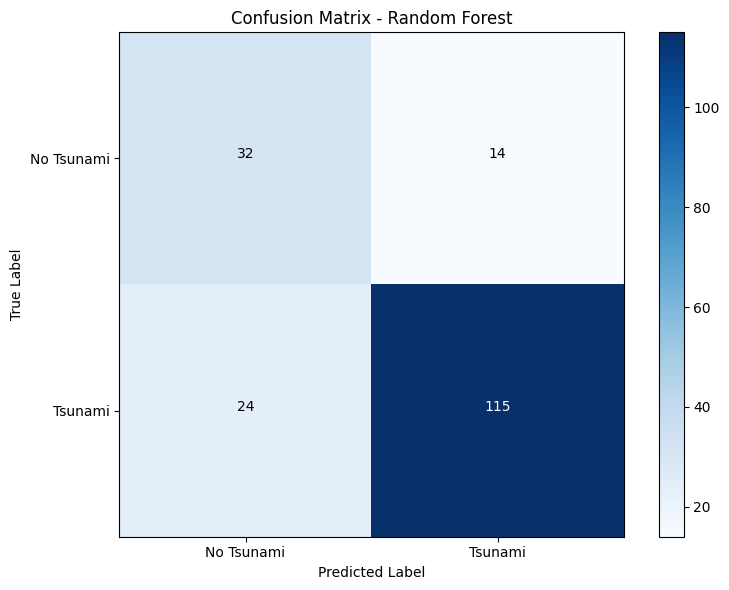

In [65]:
best_pipeline = trained_pipelines[best_model]
y_pred_best = results[best_model]['y_pred']

print(f"Detailed Classification Report for {best_model}:")
print("=" * 100)
print(classification_report(y_test, y_pred_best, target_names=['No Tsunami', 'Tsunami']))

print("\nConfusion Matrix:")
print("=" * 100)
cm = confusion_matrix(y_test, y_pred_best)
cm_df = pd.DataFrame(cm, 
                     index=['Actual: No Tsunami', 'Actual: Tsunami'],
                     columns=['Predicted: No Tsunami', 'Predicted: Tsunami'])
display(cm_df)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_model}')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Tsunami', 'Tsunami'])
plt.yticks(tick_marks, ['No Tsunami', 'Tsunami'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## ROC and Precision-Recall Curves

Visualize model performance using ROC and Precision-Recall curves.

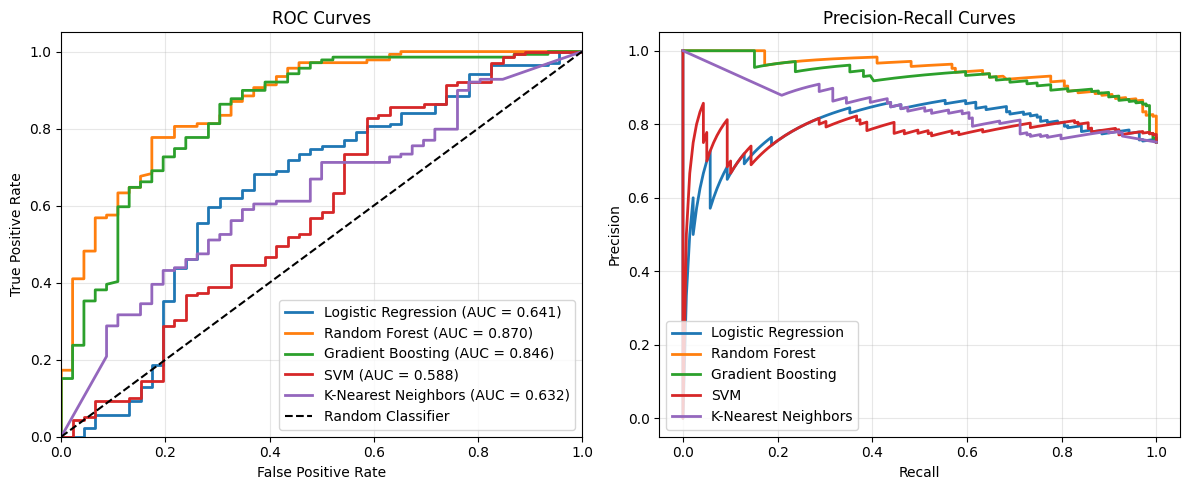

In [66]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for model_name, metrics in results.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['roc_auc']:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
for model_name, metrics in results.items():
    precision, recall, _ = precision_recall_curve(y_test, metrics['y_pred_proba'])
    plt.plot(recall, precision, label=f"{model_name}", linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Importance (for Tree-based Models)

Analyze feature importance for interpretable models.


Random Forest - Top 10 Most Important Features:


,feature,importance
5,dmin,0.275738
4,nst,0.215092
9,longitude,0.083073
14,distance_from_origin,0.075732
8,latitude,0.055480
10,abs_lat,0.047339
13,country_encoded,0.042789
6,gap,0.039137
11,mag_depth_ratio,0.036959
7,depth,0.034450


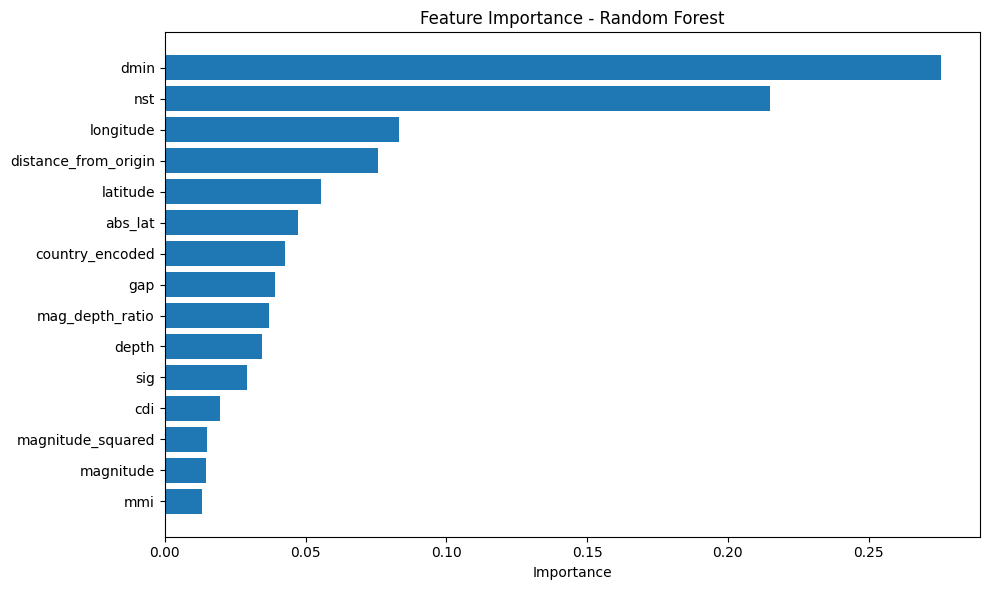


Gradient Boosting - Top 10 Most Important Features:


,feature,importance
5,dmin,0.455463
9,longitude,0.148499
14,distance_from_origin,0.134023
4,nst,0.047581
10,abs_lat,0.045010
11,mag_depth_ratio,0.040996
8,latitude,0.031052
7,depth,0.024297
3,sig,0.021529
6,gap,0.020193


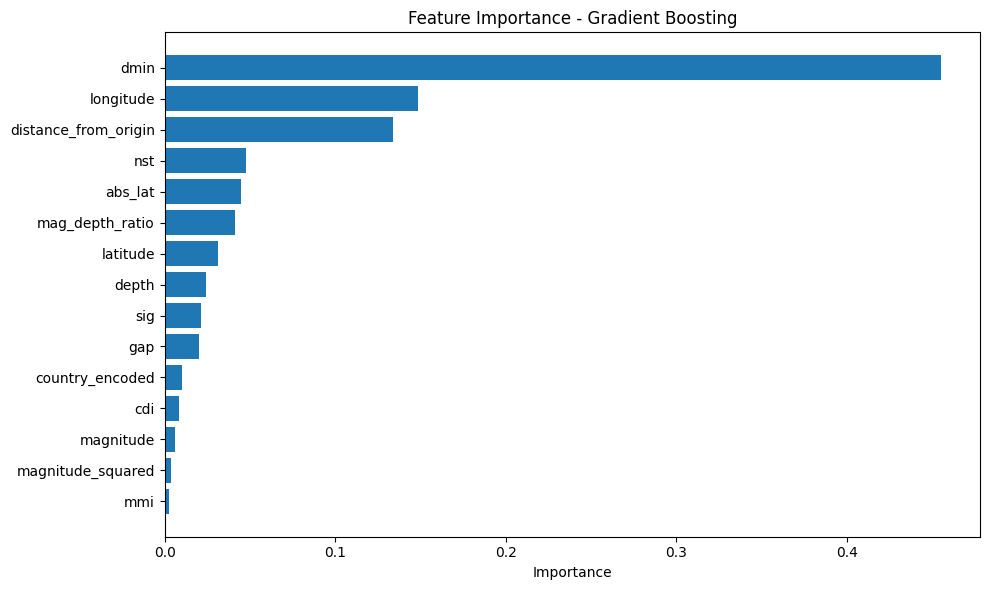

In [67]:
tree_models = ['Random Forest', 'Gradient Boosting']

for model_name in tree_models:
    if model_name in trained_pipelines:
        pipeline = trained_pipelines[model_name]
        classifier = pipeline.named_steps['classifier']
        
        feature_names = pipeline.named_steps['preprocessing'].named_steps['feature_engineering'].feature_names_
        
        if hasattr(classifier, 'feature_importances_'):
            importances = classifier.feature_importances_
            feature_importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(f"\n{model_name} - Top 10 Most Important Features:")
            print("=" * 100)
            display(feature_importance_df.head(10))
            
            plt.figure(figsize=(10, 6))
            top_features = feature_importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['importance'].values)
            plt.yticks(range(len(top_features)), top_features['feature'].values)
            plt.xlabel('Importance')
            plt.title(f'Feature Importance - {model_name}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()

# Part 6: Model Persistence and Deployment

This section covers saving the trained models and pipeline for future use and deployment. We save the best model, all trained pipelines, evaluation results, and metadata to disk, allowing us to reuse the models without retraining. This is essential for production deployment and sharing models with others.


## Save Pipeline for Reuse

Save the best pipeline for future use and deployment.

In [68]:
current_dir = Path().resolve()
if current_dir.name == "notebooks":
    project_root = current_dir.parent
elif (current_dir / "requirements.txt").exists():
    project_root = current_dir
else:
    project_root = current_dir.parent

output_dir = project_root / "outputs"
output_dir.mkdir(exist_ok=True)

best_pipeline_path = output_dir / "best_pipeline.joblib"
joblib.dump(best_pipeline, best_pipeline_path)
print(f"Best pipeline saved to: {best_pipeline_path}")

all_pipelines_path = output_dir / "all_pipelines.joblib"
joblib.dump(trained_pipelines, all_pipelines_path)
print(f"All pipelines saved to: {all_pipelines_path}")

results_path = output_dir / "model_results.csv"
results_df.to_csv(results_path)
print(f"Results saved to: {results_path}")

metadata = {
    'best_model': best_model,
    'feature_columns': FEATURE_COLS,
    'target': TARGET,
    'train_size': len(X_train),
    'test_size': len(X_test),
    'split_year': split_year
}
metadata_path = output_dir / "pipeline_metadata.joblib"
joblib.dump(metadata, metadata_path)
print(f"Metadata saved to: {metadata_path}")

print("\n" + "=" * 100)
print("Pipeline saved successfully!")
print(f"\nLocal files:")
print(f"  -> pipeline = joblib.load('{best_pipeline_path}')")
print(f"  -> predictions = pipeline.predict(new_data)")
print(f"\nMLflow tracking:")
print(f"  -> All models and runs are tracked in: {mlflow_dir}")
print(f"  -> View UI: mlflow ui --backend-store-uri {mlflow_dir}")
print(f"  -> Load from MLflow: mlflow.sklearn.load_model('runs:/<run_id>/model')")
print("=" * 100)

Best pipeline saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/best_pipeline.joblib
All pipelines saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/all_pipelines.joblib
Results saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/model_results.csv
Metadata saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/pipeline_metadata.joblib

Pipeline saved successfully!

Local files:
  -> pipeline = joblib.load('/Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/best_pipeline.joblib')
  -> predictions = pipeline.predict(new_data)

MLflow tracking:
  -> All models and runs are tracked in: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/mlruns
  -> View UI: mlflow ui --backend-store-uri /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Pro

## Load and Use Saved Pipeline

Example of how to load and use the saved pipeline for new predictions.

In [69]:
print("To use the saved pipeline:")
print("1. Load: pipeline = joblib.load('outputs/best_pipeline.joblib')")
print("2. Predict: predictions = pipeline.predict(new_data)")
print("3. Probabilities: probabilities = pipeline.predict_proba(new_data)")

To use the saved pipeline:
1. Load: pipeline = joblib.load('outputs/best_pipeline.joblib')
2. Predict: predictions = pipeline.predict(new_data)
3. Probabilities: probabilities = pipeline.predict_proba(new_data)


# Part 7: Predictive Analysis for 2023

This section demonstrates the practical application of our trained model by generating predictions for potential tsunami scenarios in 2023. We will create realistic combinations of earthquake features based on historical patterns and use our best-performing model to identify the 10 most probable tsunami scenarios. This predictive analysis helps illustrate how the model can be used for risk assessment and early warning systems, providing actionable insights based on the patterns learned from historical data.


## Generate Scenarios for 2023

We create realistic earthquake scenarios for 2023 by sampling from the historical distribution of features. This approach ensures that our predictions are based on plausible combinations of earthquake characteristics that have been observed in the past. We generate multiple scenarios covering different magnitude ranges, depths, and geographic locations to comprehensively assess tsunami risk.


In [70]:
from itertools import product

magnitude_range = np.linspace(df['magnitude'].min(), df['magnitude'].max(), 10)
depth_range = np.linspace(df['depth'].min(), df['depth'].max(), 8)
latitude_range = np.linspace(df['latitude'].min(), df['latitude'].max(), 10)
longitude_range = np.linspace(df['longitude'].min(), df['longitude'].max(), 10)

np.random.seed(42)
n_scenarios = 100

scenarios_2023 = []

for i in range(n_scenarios):
    magnitude = np.random.choice(magnitude_range)
    depth = np.random.choice(depth_range)
    latitude = np.random.choice(latitude_range)
    longitude = np.random.choice(longitude_range)
    
    cdi = np.random.choice(df['cdi'].dropna().values) if not df['cdi'].isna().all() else np.nan
    mmi = np.random.choice(df['mmi'].dropna().values) if not df['mmi'].isna().all() else np.nan
    sig = np.random.choice(df['sig'].dropna().values) if not df['sig'].isna().all() else np.nan
    nst = np.random.choice(df['nst'].dropna().values) if not df['nst'].isna().all() else np.nan
    dmin = np.random.choice(df['dmin'].dropna().values) if not df['dmin'].isna().all() else np.nan
    gap = np.random.choice(df['gap'].dropna().values) if not df['gap'].isna().all() else np.nan
    
    scenario = {
        'magnitude': magnitude,
        'depth': depth,
        'latitude': latitude,
        'longitude': longitude,
        'cdi': cdi,
        'mmi': mmi,
        'sig': sig,
        'nst': nst,
        'dmin': dmin,
        'gap': gap,
        'Year': 2023,
        'Month': np.random.randint(1, 13)
    }
    scenarios_2023.append(scenario)

scenarios_df = pd.DataFrame(scenarios_2023)

scenarios_df['abs_lat'] = scenarios_df['latitude'].abs()
scenarios_df['mag_depth_ratio'] = scenarios_df['magnitude'] / (scenarios_df['depth'] + 1.0)

for col in ['cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap']:
    if scenarios_df[col].isna().any():
        scenarios_df[col].fillna(df[col].median(), inplace=True)

print(f"Generated {len(scenarios_df)} earthquake scenarios for 2023")
print(f"\nScenario statistics:")
print(scenarios_df[['magnitude', 'depth', 'latitude', 'longitude']].describe())


Generated 100 earthquake scenarios for 2023

Scenario statistics:
        magnitude       depth    latitude   longitude
count  100.000000  100.000000  100.000000  100.000000
mean     7.797111  358.707186    6.226196    7.439189
std      0.882088  226.535647   42.270183  113.119940
min      6.500000    2.700000  -61.848400 -179.968000
25%      7.077778   98.144286  -32.186267  -60.091333
50%      7.944444  384.477143   -2.524133   19.826444
75%      8.522222  575.365714   41.969067   99.744222
max      9.100000  670.810000   71.631200  179.662000


## Predict Tsunami Probabilities

Using our best-trained model, we predict the probability of tsunami occurrence for each generated scenario. The model outputs probabilities between 0 and 1, where values closer to 1 indicate higher likelihood of tsunami occurrence. We then identify the top 10 scenarios with the highest tsunami probabilities, which represent the most concerning earthquake scenarios for 2023 based on our model's learned patterns.


In [71]:
X_scenarios = scenarios_df.copy()

for col in FEATURE_COLS:
    if col not in X_scenarios.columns:
        if col == '_mag_bin':
            bins = np.arange(0, 11, 1)
            labels = [f"{i}" for i in range(0, 10)]
            X_scenarios['_mag_bin'] = pd.cut(X_scenarios['magnitude'].clip(lower=0, upper=10), 
                                            bins=bins, labels=labels, include_lowest=True)
        elif col == 'country_encoded':
            X_scenarios['country_encoded'] = 0  # Default value
        else:
            X_scenarios[col] = df[col].median() if col in df.columns else 0

X_scenarios = X_scenarios[FEATURE_COLS].copy()

tsunami_probabilities = best_pipeline.predict_proba(X_scenarios)[:, 1]
tsunami_predictions = best_pipeline.predict(X_scenarios)

scenarios_df['tsunami_probability'] = tsunami_probabilities
scenarios_df['tsunami_prediction'] = tsunami_predictions

top_10_scenarios = scenarios_df.nlargest(10, 'tsunami_probability').copy()

print("Identifying countries for top 10 scenarios...")
coords_top10 = list(zip(top_10_scenarios['latitude'].astype(float), top_10_scenarios['longitude'].astype(float)))
results_top10 = rg.search(coords_top10)
ccodes_top10 = [r["cc"] for r in results_top10]

def cc_to_name(cc):
    try:
        return pycountry.countries.get(alpha_2=cc).name
    except Exception:
        return cc

countries_top10 = [cc_to_name(cc) for cc in ccodes_top10]
top_10_scenarios['country'] = countries_top10

print("=" * 100)
print("TOP 10 MOST PROBABLE TSUNAMI SCENARIOS FOR 2023")
print("=" * 100)
print(f"\nModel used: {best_model}")
print(f"Total scenarios analyzed: {len(scenarios_df)}")
print(f"Scenarios predicted as tsunami: {tsunami_predictions.sum()}")
print(f"\nTop 10 scenarios by tsunami probability:\n")

display_cols = ['magnitude', 'depth', 'latitude', 'longitude', 'country', 'tsunami_probability', 'tsunami_prediction']
top_10_display = top_10_scenarios[display_cols].copy()
top_10_display['tsunami_probability'] = top_10_display['tsunami_probability'].apply(lambda x: f"{x:.4f}")
top_10_display['magnitude'] = top_10_display['magnitude'].apply(lambda x: f"{x:.2f}")
top_10_display['depth'] = top_10_display['depth'].apply(lambda x: f"{x:.2f}")
top_10_display['latitude'] = top_10_display['latitude'].apply(lambda x: f"{x:.2f}")
top_10_display['longitude'] = top_10_display['longitude'].apply(lambda x: f"{x:.2f}")

display(top_10_display)


Identifying countries for top 10 scenarios...
TOP 10 MOST PROBABLE TSUNAMI SCENARIOS FOR 2023

Model used: Random Forest
Total scenarios analyzed: 100
Scenarios predicted as tsunami: 13

Top 10 scenarios by tsunami probability:



,magnitude,depth,latitude,longitude,country,tsunami_probability,tsunami_prediction
76,8.52,575.37,27.14,179.66,Marshall Islands,0.6491,1
33,7.66,575.37,-32.19,-179.97,Tonga,0.5800,1
48,6.50,2.70,41.97,179.66,Russian Federation,0.5672,1
44,7.37,384.48,71.63,179.66,Russian Federation,0.5600,1
96,7.66,670.81,56.80,-140.01,Canada,0.5592,1
10,8.52,193.59,-32.19,-179.97,Tonga,0.5556,1
72,7.37,479.92,-61.85,-179.97,New Zealand,0.5388,1
57,6.79,575.37,56.80,179.66,Russian Federation,0.5272,1
66,6.79,289.03,-2.52,139.70,Indonesia,0.5218,1
56,8.81,575.37,-2.52,179.66,Tuvalu,0.5200,1


## Detailed Analysis of Top 10 Scenarios

This section provides a detailed breakdown of the top 10 most probable tsunami scenarios, showing all relevant features for each scenario. This detailed view helps understand what combinations of earthquake characteristics our model considers most dangerous for tsunami generation.

In [72]:
print("=" * 100)
print("DETAILED FEATURES OF TOP 10 TSUNAMI SCENARIOS")
print("=" * 100)

for idx, (i, row) in enumerate(top_10_scenarios.iterrows(), 1):
    print(f"\n{'='*100}")
    print(f"SCENARIO #{idx} - Tsunami Probability: {row['tsunami_probability']:.4f} ({row['tsunami_probability']*100:.2f}%)")
    print(f"{'='*100}")
    print(f"Magnitude:        {row['magnitude']:.2f}")
    print(f"Depth (km):       {row['depth']:.2f}")
    print(f"Location:         Latitude {row['latitude']:.2f}°, Longitude {row['longitude']:.2f}°")
    print(f"Country:          {row['country']}")
    print(f"Magnitude/Depth:  {row['mag_depth_ratio']:.4f}")
    print(f"Absolute Latitude: {row['abs_lat']:.2f}°")
    print(f"CDI:              {row['cdi']:.2f}" if not pd.isna(row['cdi']) else "CDI:              N/A")
    print(f"MMI:              {row['mmi']:.2f}" if not pd.isna(row['mmi']) else "MMI:              N/A")
    print(f"Sig:              {row['sig']:.2f}" if not pd.isna(row['sig']) else "Sig:              N/A")
    print(f"Month:            {int(row['Month'])}")
    print(f"Prediction:       {'TSUNAMI LIKELY' if row['tsunami_prediction'] == 1 else 'No Tsunami'}")

print(f"\n{'='*100}")
print("SUMMARY STATISTICS OF TOP 10 SCENARIOS")
print(f"{'='*100}")
print(f"\nAverage Magnitude:        {top_10_scenarios['magnitude'].mean():.2f}")
print(f"Average Depth:            {top_10_scenarios['depth'].mean():.2f} km")
print(f"Average Tsunami Probability: {top_10_scenarios['tsunami_probability'].mean():.4f} ({top_10_scenarios['tsunami_probability'].mean()*100:.2f}%)")
print(f"Minimum Probability:     {top_10_scenarios['tsunami_probability'].min():.4f} ({top_10_scenarios['tsunami_probability'].min()*100:.2f}%)")
print(f"Maximum Probability:     {top_10_scenarios['tsunami_probability'].max():.4f} ({top_10_scenarios['tsunami_probability'].max()*100:.2f}%)")


DETAILED FEATURES OF TOP 10 TSUNAMI SCENARIOS

SCENARIO #1 - Tsunami Probability: 0.6491 (64.91%)
Magnitude:        8.52
Depth (km):       575.37
Location:         Latitude 27.14°, Longitude 179.66°
Country:          Marshall Islands
Magnitude/Depth:  0.0148
Absolute Latitude: 27.14°
CDI:              9.00
MMI:              5.00
Sig:              717.00
Month:            10
Prediction:       TSUNAMI LIKELY

SCENARIO #2 - Tsunami Probability: 0.5800 (58.00%)
Magnitude:        7.66
Depth (km):       575.37
Location:         Latitude -32.19°, Longitude -179.97°
Country:          Tonga
Magnitude/Depth:  0.0133
Absolute Latitude: 32.19°
CDI:              7.00
MMI:              9.00
Sig:              903.00
Month:            2
Prediction:       TSUNAMI LIKELY

SCENARIO #3 - Tsunami Probability: 0.5672 (56.72%)
Magnitude:        6.50
Depth (km):       2.70
Location:         Latitude 41.97°, Longitude 179.66°
Country:          Russian Federation
Magnitude/Depth:  1.7568
Absolute Latitude: 41.9

## Visualization of Top 10 Scenarios

We visualize the top 10 scenarios on a map to show their geographic distribution, and create a bar chart showing their tsunami probabilities. This helps identify geographic patterns and understand the relative risk levels of different scenarios.


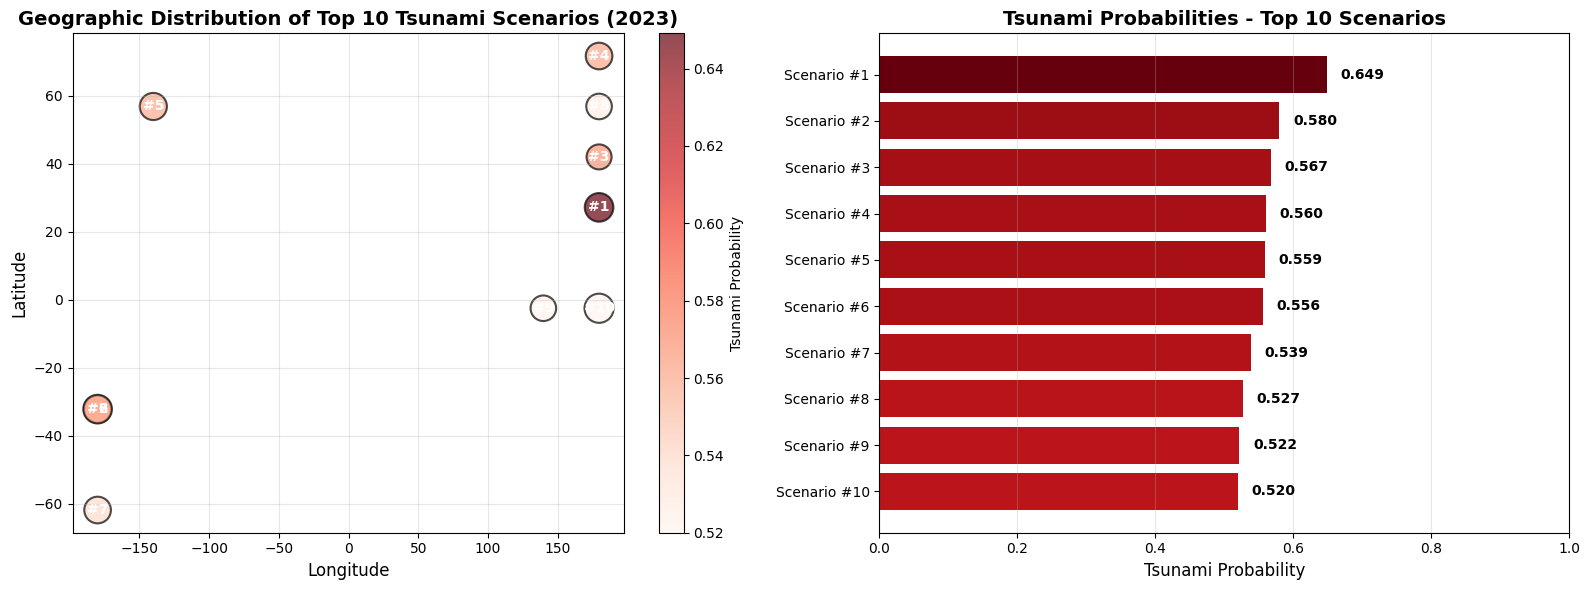

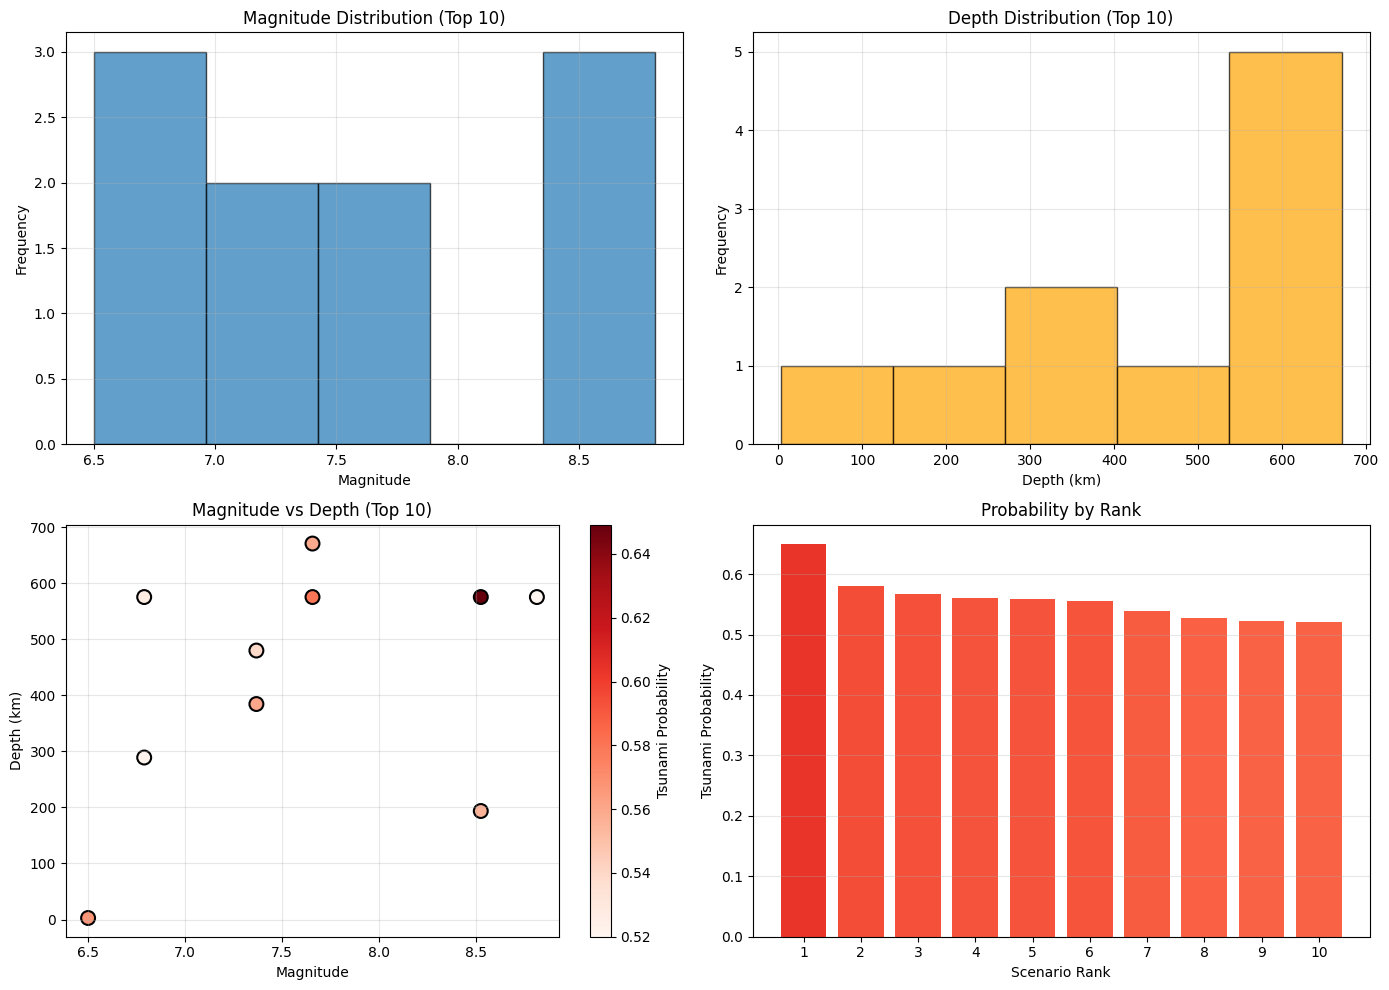

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Geographic distribution
ax1 = axes[0]
scatter = ax1.scatter(top_10_scenarios['longitude'], top_10_scenarios['latitude'], 
                     c=top_10_scenarios['tsunami_probability'], 
                     s=top_10_scenarios['magnitude']*50, 
                     cmap='Reds', alpha=0.7, edgecolors='black', linewidth=1.5)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)
ax1.set_title('Geographic Distribution of Top 10 Tsunami Scenarios (2023)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Tsunami Probability')

for idx, (i, row) in enumerate(top_10_scenarios.iterrows(), 1):
    ax1.annotate(f'#{idx}', 
                (row['longitude'], row['latitude']),
                fontsize=10, fontweight='bold',
                ha='center', va='center',
                color='white' if row['tsunami_probability'] > 0.5 else 'black')

# Plot 2: Probability bar chart
ax2 = axes[1]
colors = plt.cm.Reds(top_10_scenarios['tsunami_probability'].values / top_10_scenarios['tsunami_probability'].max())
bars = ax2.barh(range(10, 0, -1), top_10_scenarios['tsunami_probability'].values, color=colors)
ax2.set_yticks(range(10, 0, -1))
ax2.set_yticklabels([f"Scenario #{i}" for i in range(1, 11)])
ax2.set_xlabel('Tsunami Probability', fontsize=12)
ax2.set_title('Tsunami Probabilities - Top 10 Scenarios', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 1)
ax2.grid(True, alpha=0.3, axis='x')

for i, (idx, row) in enumerate(top_10_scenarios.iterrows()):
    ax2.text(row['tsunami_probability'] + 0.02, 10-i, 
            f"{row['tsunami_probability']:.3f}",
            va='center', fontweight='bold')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Magnitude distribution
axes[0, 0].hist(top_10_scenarios['magnitude'], bins=5, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Magnitude')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Magnitude Distribution (Top 10)')
axes[0, 0].grid(True, alpha=0.3)

# Depth distribution
axes[0, 1].hist(top_10_scenarios['depth'], bins=5, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Depth (km)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Depth Distribution (Top 10)')
axes[0, 1].grid(True, alpha=0.3)

# Magnitude vs Depth scatter
scatter2 = axes[1, 0].scatter(top_10_scenarios['magnitude'], top_10_scenarios['depth'],
                              c=top_10_scenarios['tsunami_probability'],
                              s=100, cmap='Reds', edgecolors='black', linewidth=1.5)
axes[1, 0].set_xlabel('Magnitude')
axes[1, 0].set_ylabel('Depth (km)')
axes[1, 0].set_title('Magnitude vs Depth (Top 10)')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1, 0], label='Tsunami Probability')

# Probability distribution
axes[1, 1].bar(range(1, 11), top_10_scenarios['tsunami_probability'].values, 
               color=plt.cm.Reds(top_10_scenarios['tsunami_probability'].values))
axes[1, 1].set_xlabel('Scenario Rank')
axes[1, 1].set_ylabel('Tsunami Probability')
axes[1, 1].set_title('Probability by Rank')
axes[1, 1].set_xticks(range(1, 11))
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Save Predictions

We save the top 10 scenarios and all predictions to a CSV file for further analysis and reference. This allows for easy sharing of results and integration with other systems or reports.


In [74]:
current_dir = Path().resolve()
if current_dir.name == "Codes (.ipynb & .py)":
    project_root = current_dir.parent
elif (current_dir / "requirements.txt").exists():
    project_root = current_dir
else:
    project_root = current_dir.parent

output_dir = project_root / "outputs"
output_dir.mkdir(exist_ok=True)

all_predictions_path = output_dir / "predictions_2023_all.csv"
scenarios_df.to_csv(all_predictions_path, index=False)
print(f"All {len(scenarios_df)} scenarios saved to: {all_predictions_path}")

top_10_path = output_dir / "predictions_2023_top10.csv"
top_10_scenarios.to_csv(top_10_path, index=False)
print(f"Top 10 scenarios saved to: {top_10_path}")

print(f"\n{'='*100}")
print("Predictive analysis complete!")
print(f"{'='*100}")
print(f"\nKey findings:")
print(f"  - Analyzed {len(scenarios_df)} potential earthquake scenarios for 2023")
print(f"  - Identified {tsunami_predictions.sum()} scenarios with tsunami risk")
print(f"  - Top 10 scenarios have probabilities ranging from {top_10_scenarios['tsunami_probability'].min():.4f} to {top_10_scenarios['tsunami_probability'].max():.4f}")
print(f"  - Average probability of top 10: {top_10_scenarios['tsunami_probability'].mean():.4f} ({top_10_scenarios['tsunami_probability'].mean()*100:.2f}%)")
print(f"\nFiles saved:")
print(f"  - {all_predictions_path}")
print(f"  - {top_10_path}")


All 100 scenarios saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/predictions_2023_all.csv
Top 10 scenarios saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/predictions_2023_top10.csv

Predictive analysis complete!

Key findings:
  - Analyzed 100 potential earthquake scenarios for 2023
  - Identified 13 scenarios with tsunami risk
  - Top 10 scenarios have probabilities ranging from 0.5200 to 0.6491
  - Average probability of top 10: 0.5579 (55.79%)

Files saved:
  - /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/predictions_2023_all.csv
  - /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/predictions_2023_top10.csv
